## Applied - Question 11

In this problem we will investigate the t-statistic for the null hypothesis $\beta_0 = 0$ in simple
linear regression without intercept. Lets start with import blocks

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

Creating data and a simple scatter plot

In [2]:
x = np.random.normal(0, 1, 100)
y = 2*x + np.random.normal(0, 1, 100)
df = pd.DataFrame({'y':y, 'x':x})
df.head()

,y,x
0,0.529300,0.650073
1,-0.162872,-1.112431
2,-6.043311,-2.649434
3,1.564844,0.754905
4,2.793669,1.225390


Text(0, 0.5, 'y')

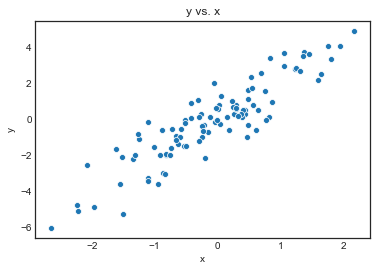

In [3]:
fig = sns.scatterplot(x=x, y=y, data=df)
fig.axes.set_title('y vs. x')
fig.axes.set_xlabel('x')
fig.axes.set_ylabel('y')

(a) Simple linear without intercept or intercept = 0

In [4]:
model = smf.ols('y ~ x - 1', data=df)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              434.1
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                    5.66e-38
Time:                        21:28:35   Log-Likelihood:                         -136.03
No. Observations:                 100   AIC:                                      274.1
Df Residuals:                      99   BIC:                                      276.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9956      0.096     20.835      0.000       1.806       2.186
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.556
Skew:                          -0.078   Prob(JB):                        0.757
Kurtosis:                       2.669   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have $\hat{\beta} = 1.9495$ with standard error of 0.101. This coefficient is statistically significant
based on 3 factors: F-statistic >> 1, F-statistic p-value is almost 0, p-value of $\hat{\beta}$ is near 0.  
Null hypothesis is rejected.

The simple linear regression of x onto y without intercept.

In [5]:
model = smf.ols('x ~ y - 1', data=df)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              434.1
Date:                Wed, 16 Oct 2019   Prob (F-statistic):                    5.66e-38
Time:                        21:28:35   Log-Likelihood:                         -56.669
No. Observations:                 100   AIC:                                      115.3
Df Residuals:                      99   BIC:                                      117.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.4081      0.020     20.835      0.000       0.369       0.447
==============================================================================
Omnibus:                        0.474   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.494
Skew:                          -0.159   Prob(JB):                        0.781
Kurtosis:                       2.869   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have $\hat{\beta}$ with standard error given above. This coefficient is statistically significant
based on 3 factors: F-statistic >> 1, F-statistic p-value is almost 0, p-value of $\hat{\beta}$ is near 0.  
Null hypothesis is rejected.

The results in (a) and (b) reflect the same line/formula that we created. 

(d) t-statistic is the same as above summary

In [6]:
from IPython.display import Image
Image("11d.jpg")

# t-statistic
t = (np.sqrt(len(x)-1) * sum(x*y)) / (np.sqrt(sum(x*x) * sum(y*y) - (sum(x*y))**2))
print(f't-statistic = {t}')

t-statistic = 20.835459194575197


(e) Since they are interchangeable in the formula, swiching y onto x and x onto y will give the same
t-statistic

(f) While algebra will be an easy proof for this, lets try to use python for this.

In [7]:
model = smf.ols('y ~ x', data=df)
model_fit = model.fit()
model_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0674,0.095,0.707,0.481,-0.122,0.257
x,2.0016,0.096,20.763,0.000,1.810,2.193


In [8]:
model = smf.ols('x ~ y', data=df)
model_fit = model.fit()
model_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0438,0.043,-1.022,0.309,-0.129,0.041
y,0.4071,0.020,20.763,0.000,0.368,0.446


## Question 12

(a) We have $\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}$ given by 3.38. Thus, the the coefficient for 
y onto x and x on to y is equal if and only if $\sum x_i^2 = \sum y_i^2$

(b) For a different coefficient, we just need a scalar. Lets $y = 2x$

In [11]:
y = 5*x
df = pd.DataFrame({'y':y, 'x':x})

model = smf.ols('y ~ x - 1', data=df)
model_fit = model.fit()
model_fit.params

x    5.0
dtype: float64

In [12]:
model = smf.ols('x ~ y - 1', data=df)
model_fit = model.fit()
model_fit.params

y    0.2
dtype: float64

(c) For the same coefficient, the easiest way is to sample y from x. This will make sure their 
sum of squares are the same.

In [15]:
import random
y = random.sample(list(x), len(x))
df = pd.DataFrame({'y':y, 'x':x})

model = smf.ols('y ~ x - 1', data=df)
model_fit = model.fit()
model_fit.params

x    0.129618
dtype: float64

In [16]:
model = smf.ols('x ~ y - 1', data=df)
model_fit = model.fit()
model_fit.params

y    0.129618
dtype: float64

And that works! 